In [27]:
import matplotlib
from matplotlib import font_manager,rc 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [3]:
from matplotlib import font_manager,rc 
#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [46]:
crime = pd.read_csv("C:/Users/chohe/kpc.python/210705/miniproject01_data/nightlife_crime.csv",encoding='euc-kr')
crime.head(3)

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649


In [47]:
crime_teen = pd.read_csv("C:/Users/chohe/kpc.python/210705/miniproject01_data/crime_teenager.csv",encoding='euc-kr')
crime_teen.head(3)

,location,murder,robbery,forcible_rape,thief,violence
0,중부,0,0,1,44,42
1,종로,0,3,4,34,57
2,남대문,0,0,0,43,4


In [48]:
#print(crime_teen.location)
#print(crime.region)

In [49]:
print(crime_teen.location.count().sum())
print(crime.region.count().sum())

31
25


In [50]:
crime_teen.describe()

,murder,robbery,forcible_rape,thief,violence
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.096774,1.838710,7.838710,118.870968,116.741935
std,0.300537,2.192362,5.927882,62.701803,75.131870
min,0.000000,0.000000,0.000000,32.000000,4.000000
25%,0.000000,0.000000,4.500000,63.000000,65.500000
50%,0.000000,1.000000,7.000000,120.000000,107.000000
75%,0.000000,3.000000,9.000000,161.500000,161.000000
max,1.000000,6.000000,29.000000,273.000000,337.000000


In [51]:
crime.describe()

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000
mean,93.160000,121.680000,214.840000,0.120000,2.360000,9.800000,147.20000,145.760000,5.84000,10.72000,199.200000,1989.600000,2369.920000
std,82.724281,70.028994,138.638823,0.331662,2.378375,6.075909,51.63655,70.221839,3.48425,4.68615,80.714001,664.605585,700.897991
min,7.000000,52.000000,74.000000,0.000000,0.000000,3.000000,56.00000,65.000000,1.00000,2.00000,70.000000,851.000000,1201.000000
25%,30.000000,81.000000,110.000000,0.000000,0.000000,6.000000,119.00000,76.000000,3.00000,7.00000,126.000000,1557.000000,1852.000000
50%,71.000000,105.000000,175.000000,0.000000,2.000000,8.000000,146.00000,144.000000,5.00000,9.00000,194.000000,1982.000000,2548.000000
75%,113.000000,129.000000,278.000000,0.000000,4.000000,12.000000,170.00000,193.000000,8.00000,14.00000,281.000000,2484.000000,2847.000000
max,283.000000,354.000000,637.000000,1.000000,6.000000,29.000000,273.00000,337.000000,14.00000,22.00000,334.000000,3239.000000,3572.000000


In [52]:
df1 = crime_teen.copy()

In [53]:
df1_location = df1.set_index('location')
df1_location

,murder,robbery,forcible_rape,thief,violence
location,,,,,
중부,0,0,1,44,42
종로,0,3,4,34,57
남대문,0,0,0,43,4
서대문,0,4,5,142,103
혜화,0,2,2,38,29
용산,0,4,4,56,70
성북,0,1,5,69,99
동대문,1,1,5,126,76
마포,0,0,13,156,164


In [54]:
corr = df1.corr(method = 'pearson')
corr

,murder,robbery,forcible_rape,thief,violence
murder,1.000000,-0.076702,-0.065788,0.097974,-0.023953
robbery,-0.076702,1.000000,0.164649,0.162794,0.242176
forcible_rape,-0.065788,0.164649,1.000000,0.437853,0.460940
thief,0.097974,0.162794,0.437853,1.000000,0.856375
violence,-0.023953,0.242176,0.460940,0.856375,1.000000


### violence 와 다른 범죄들의 산점도 그래프

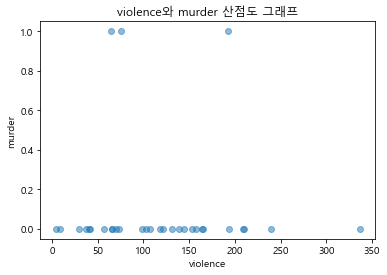

In [55]:
X = df1.violence.values
Y = df1.murder.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('violence')
plt.ylabel('murder')
plt.title('violence와 murder 산점도 그래프')
plt.show()

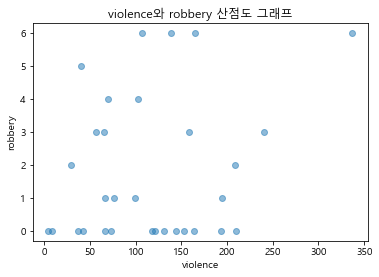

In [56]:
X = df1.violence.values
Y = df1.robbery.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('violence')
plt.ylabel('robbery')
plt.title('violence와 robbery 산점도 그래프')
plt.show()

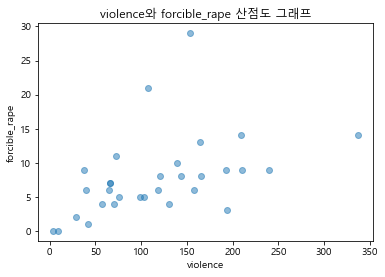

In [57]:
X = df1.violence.values
Y = df1.forcible_rape.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('violence')
plt.ylabel('forcible_rape')
plt.title('violence와 forcible_rape 산점도 그래프')
plt.show()

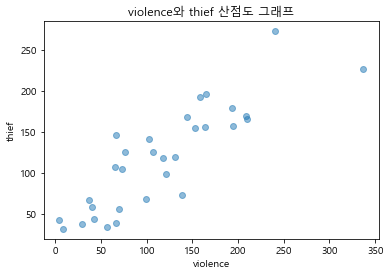

In [58]:
X = df1.violence.values
Y = df1.thief.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('violence')
plt.ylabel('thief')
plt.title('violence와 thief 산점도 그래프')
plt.show()

### thief 와 다른 범죄들의 산점도 그래프

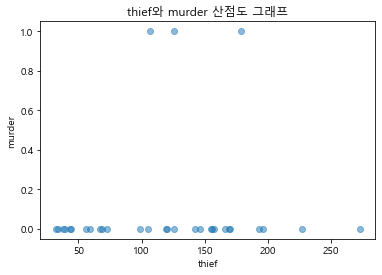

In [59]:
X = df1.thief.values
Y = df1.murder.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('thief')
plt.ylabel('murder')
plt.title('thief와 murder 산점도 그래프')
plt.show()

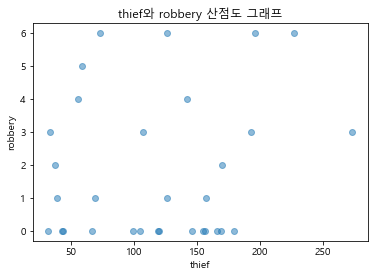

In [60]:
X = df1.thief.values
Y = df1.robbery.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('thief')
plt.ylabel('robbery')
plt.title('thief와 robbery 산점도 그래프')
plt.show()

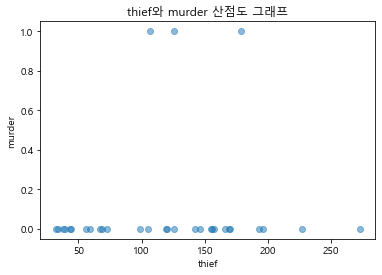

In [61]:
X = df1.thief.values
Y = df1.murder.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('thief')
plt.ylabel('murder')
plt.title('thief와 murder 산점도 그래프')
plt.show()

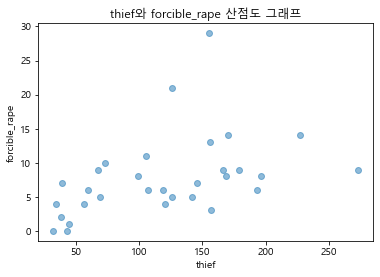

In [62]:
X = df1.thief.values
Y = df1.forcible_rape.values
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel('thief')
plt.ylabel('forcible_rape')
plt.title('thief와 forcible_rape 산점도 그래프')
plt.show()

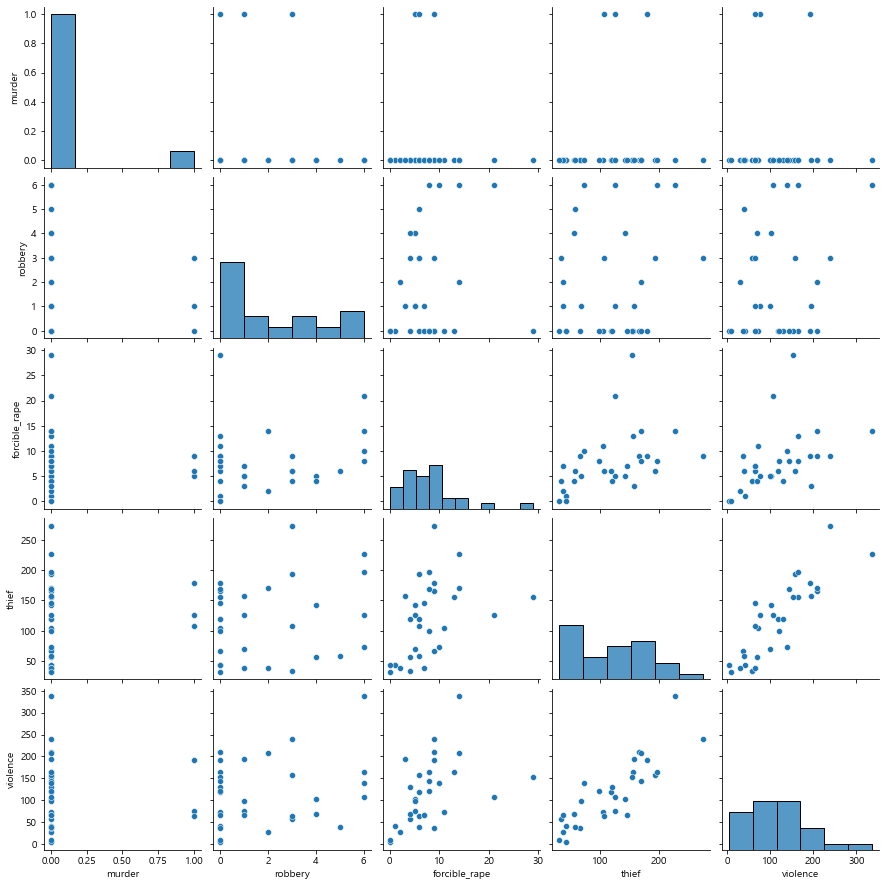

In [63]:
sns.pairplot(df1_location)
plt.show()

C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\chohe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


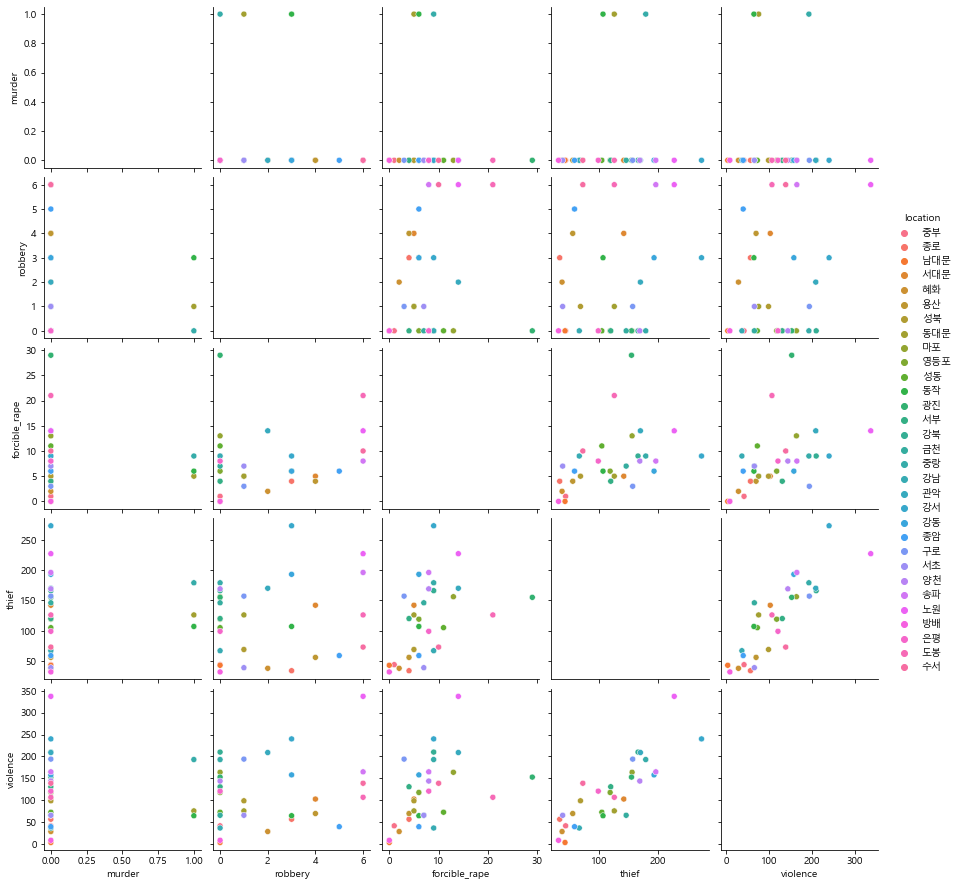

In [64]:
sns.pairplot(df1, hue= "location")
plt.show()

<AxesSubplot:>

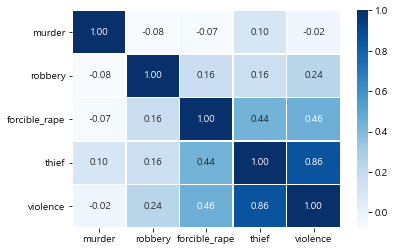

In [65]:
sns.heatmap(data = df1.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')


# 내부 속성중 annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것이고, 
# fmt 는  annot=True 인 경우에, 숫자 표시 
# (.2f 는  소수 두번째자리까지 표시 )
# cmap 은 색상 

<AxesSubplot:>

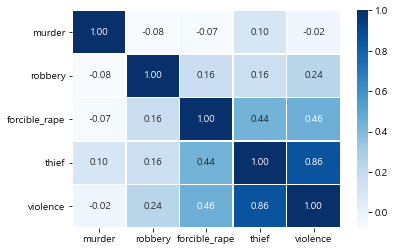

In [66]:
sns.heatmap(data = df1_location.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')


# 내부 속성중 annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것이고, 
# fmt 는  annot=True 인 경우에, 숫자 표시 
# (.2f 는  소수 두번째자리까지 표시 )
# cmap 은 색상 

In [67]:
x_data = df1[['murder','robbery','forcible_rape','violence']]
target = df1[['thief']]
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  thief   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     19.73
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.43e-07
Time:                        14:18:22   Log-Likelihood:                -150.14
No. Observations:                  31   AIC:                             310.3
Df Residuals:                      26   BIC:                             317.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.4696     12.583      2.501      0.019       5.604      57.335
murder           24.8638     20.462      1.215      0.235     -17.195      66.923
robbery          -1.2044      2.890     -0.417      0.680      -7.145       4.736
forcible_rape     0.6967      1.168      0.597      0.556      -1.704       3.097
violence          0.7002      0.094      7.487      0.000       0.508       0.892
==============================================================================
Omnibus:                        2.130   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.670
Skew:                           0.563   Prob(JB):                        0.434
Kurtosis:                       2.836   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
x_data = df1[['murder','robbery','forcible_rape','thief']]
target = df1[['violence']]
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               violence   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     20.53
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           9.76e-08
Time:                        14:18:22   Log-Likelihood:                -155.28
No. Observations:                  31   AIC:                             320.6
Df Residuals:                      26   BIC:                             327.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.9383     16.403     -0.667      0.511     -44.656      22.779
murder          -22.8476     24.420     -0.936      0.358     -73.044      27.348
robbery           3.0440      3.370      0.903      0.375      -3.884       9.972
forcible_rape     1.0623      1.372      0.774      0.446      -1.758       3.882
thief             0.9756      0.130      7.487      0.000       0.708       1.243
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.789
Skew:                           0.362   Prob(JB):                        0.674
Kurtosis:                       2.706   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
df2 = crime.copy()

In [70]:
df2_region = df2.set_index('region')
df2_region

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
region,,,,,,,,,,,,,
강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298
광진,19,91,110,0,0,29,155,153,4,14,240,3026,2625
구로,38,110,148,0,1,3,157,194,8,15,281,2335,3007
금천,60,82,142,0,0,7,146,66,3,6,151,1567,2054
노원,30,57,87,0,6,14,227,337,10,7,197,2193,2723


In [71]:
corr = df2.corr(method = 'pearson')
corr

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
pub,1.000000,0.645022,0.922502,-0.166262,0.158527,-0.113338,-0.151376,-0.050001,0.072228,0.323537,0.335075,0.305869,0.235928
karaoke,0.645022,1.000000,0.889996,-0.161529,0.113546,0.032942,0.041039,0.118708,0.205042,0.674551,0.389660,0.336648,0.345229
tot_nightlife,0.922502,0.889996,1.000000,-0.180798,0.151945,-0.050988,-0.069595,0.030126,0.146668,0.533779,0.396760,0.352556,0.315157
murder,-0.166262,-0.161529,-0.180798,1.000000,-0.162691,-0.194361,-0.072016,-0.184772,0.197589,0.022519,0.073777,0.002306,0.034995
robbery,0.158527,0.113546,0.151945,-0.162691,1.000000,0.108991,-0.018253,0.089853,-0.083264,-0.001794,-0.017104,-0.077351,-0.169198
forcible_rape,-0.113338,0.032942,-0.050988,-0.194361,0.108991,1.000000,0.231349,0.315121,-0.160998,0.189656,0.024979,0.149235,0.011737
thef,-0.151376,0.041039,-0.069595,-0.072016,-0.018253,0.231349,1.000000,0.831345,0.294538,0.036402,0.200416,0.318950,0.503613
violence,-0.050001,0.118708,0.030126,-0.184772,0.089853,0.315121,0.831345,1.000000,0.348094,0.136156,0.176941,0.245778,0.452651
murder_tot,0.072228,0.205042,0.146668,0.197589,-0.083264,-0.160998,0.294538,0.348094,1.000000,0.497314,0.558237,0.633720,0.760524
robbery_Tot,0.323537,0.674551,0.533779,0.022519,-0.001794,0.189656,0.036402,0.136156,0.497314,1.000000,0.642607,0.581220,0.637886


<AxesSubplot:>

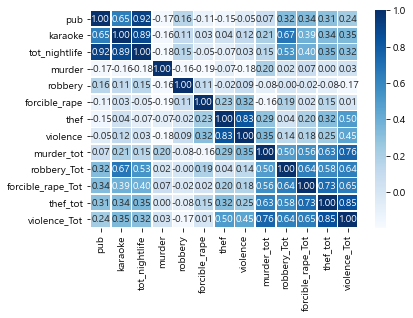

In [72]:
sns.heatmap(data = df2.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')


# 내부 속성중 annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것이고, 
# fmt 는  annot=True 인 경우에, 숫자 표시 
# (.2f 는  소수 두번째자리까지 표시 )
# cmap 은 색상 

In [73]:
y_data = df2[['murder','robbery','forcible_rape','thef','violence']]
target2 = df2[['pub']]
y_data1 = sm.add_constant(y_data, has_constant='add')

multi_model = sm.OLS(target2, y_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pub   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.4128
Date:                Fri, 09 Jul 2021   Prob (F-statistic):              0.834
Time:                        14:18:29   Log-Likelihood:                -144.06
No. Observations:                  25   AIC:                             300.1
Df Residuals:                      19   BIC:                             307.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           142.4260     63.439      2.245      0.037       9.648     275.204
murder          -39.8433     56.873     -0.701      0.492    -158.879      79.193
robbery           4.3855      7.796      0.563      0.580     -11.933      20.703
forcible_rape    -2.0921      3.168     -0.660      0.517      -8.722       4.538
thef             -0.4656      0.643     -0.724      0.478      -1.811       0.879
violence          0.2346      0.488      0.480      0.636      -0.787       1.257
==============================================================================
Omnibus:                        2.446   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                2.072
Skew:                           0.671   Prob(JB):                        0.355
Kurtosis:                       2.566   Cond. No.                         846.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
y_data = df2[['murder','robbery','forcible_rape','thef','violence']]
target2 = df2[['karaoke']]
y_data1 = sm.add_constant(y_data, has_constant='add')

multi_model = sm.OLS(target2, y_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                karaoke   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.203
Method:                 Least Squares   F-statistic:                    0.1892
Date:                Fri, 09 Jul 2021   Prob (F-statistic):              0.963
Time:                        14:18:29   Log-Likelihood:                -140.58
No. Observations:                  25   AIC:                             293.2
Df Residuals:                      19   BIC:                             300.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           119.7251     55.188      2.169      0.043       4.216     235.234
murder          -26.7743     49.476     -0.541      0.595    -130.329      76.780
robbery           2.2192      6.782      0.327      0.747     -11.977      16.415
forcible_rape    -0.4083      2.756     -0.148      0.884      -6.176       5.359
thef             -0.1817      0.559     -0.325      0.749      -1.352       0.988
violence          0.2105      0.425      0.495      0.626      -0.679       1.100
==============================================================================
Omnibus:                       20.462   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.652
Skew:                           1.821   Prob(JB):                     1.63e-06
Kurtosis:                       6.509   Cond. No.                         846.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

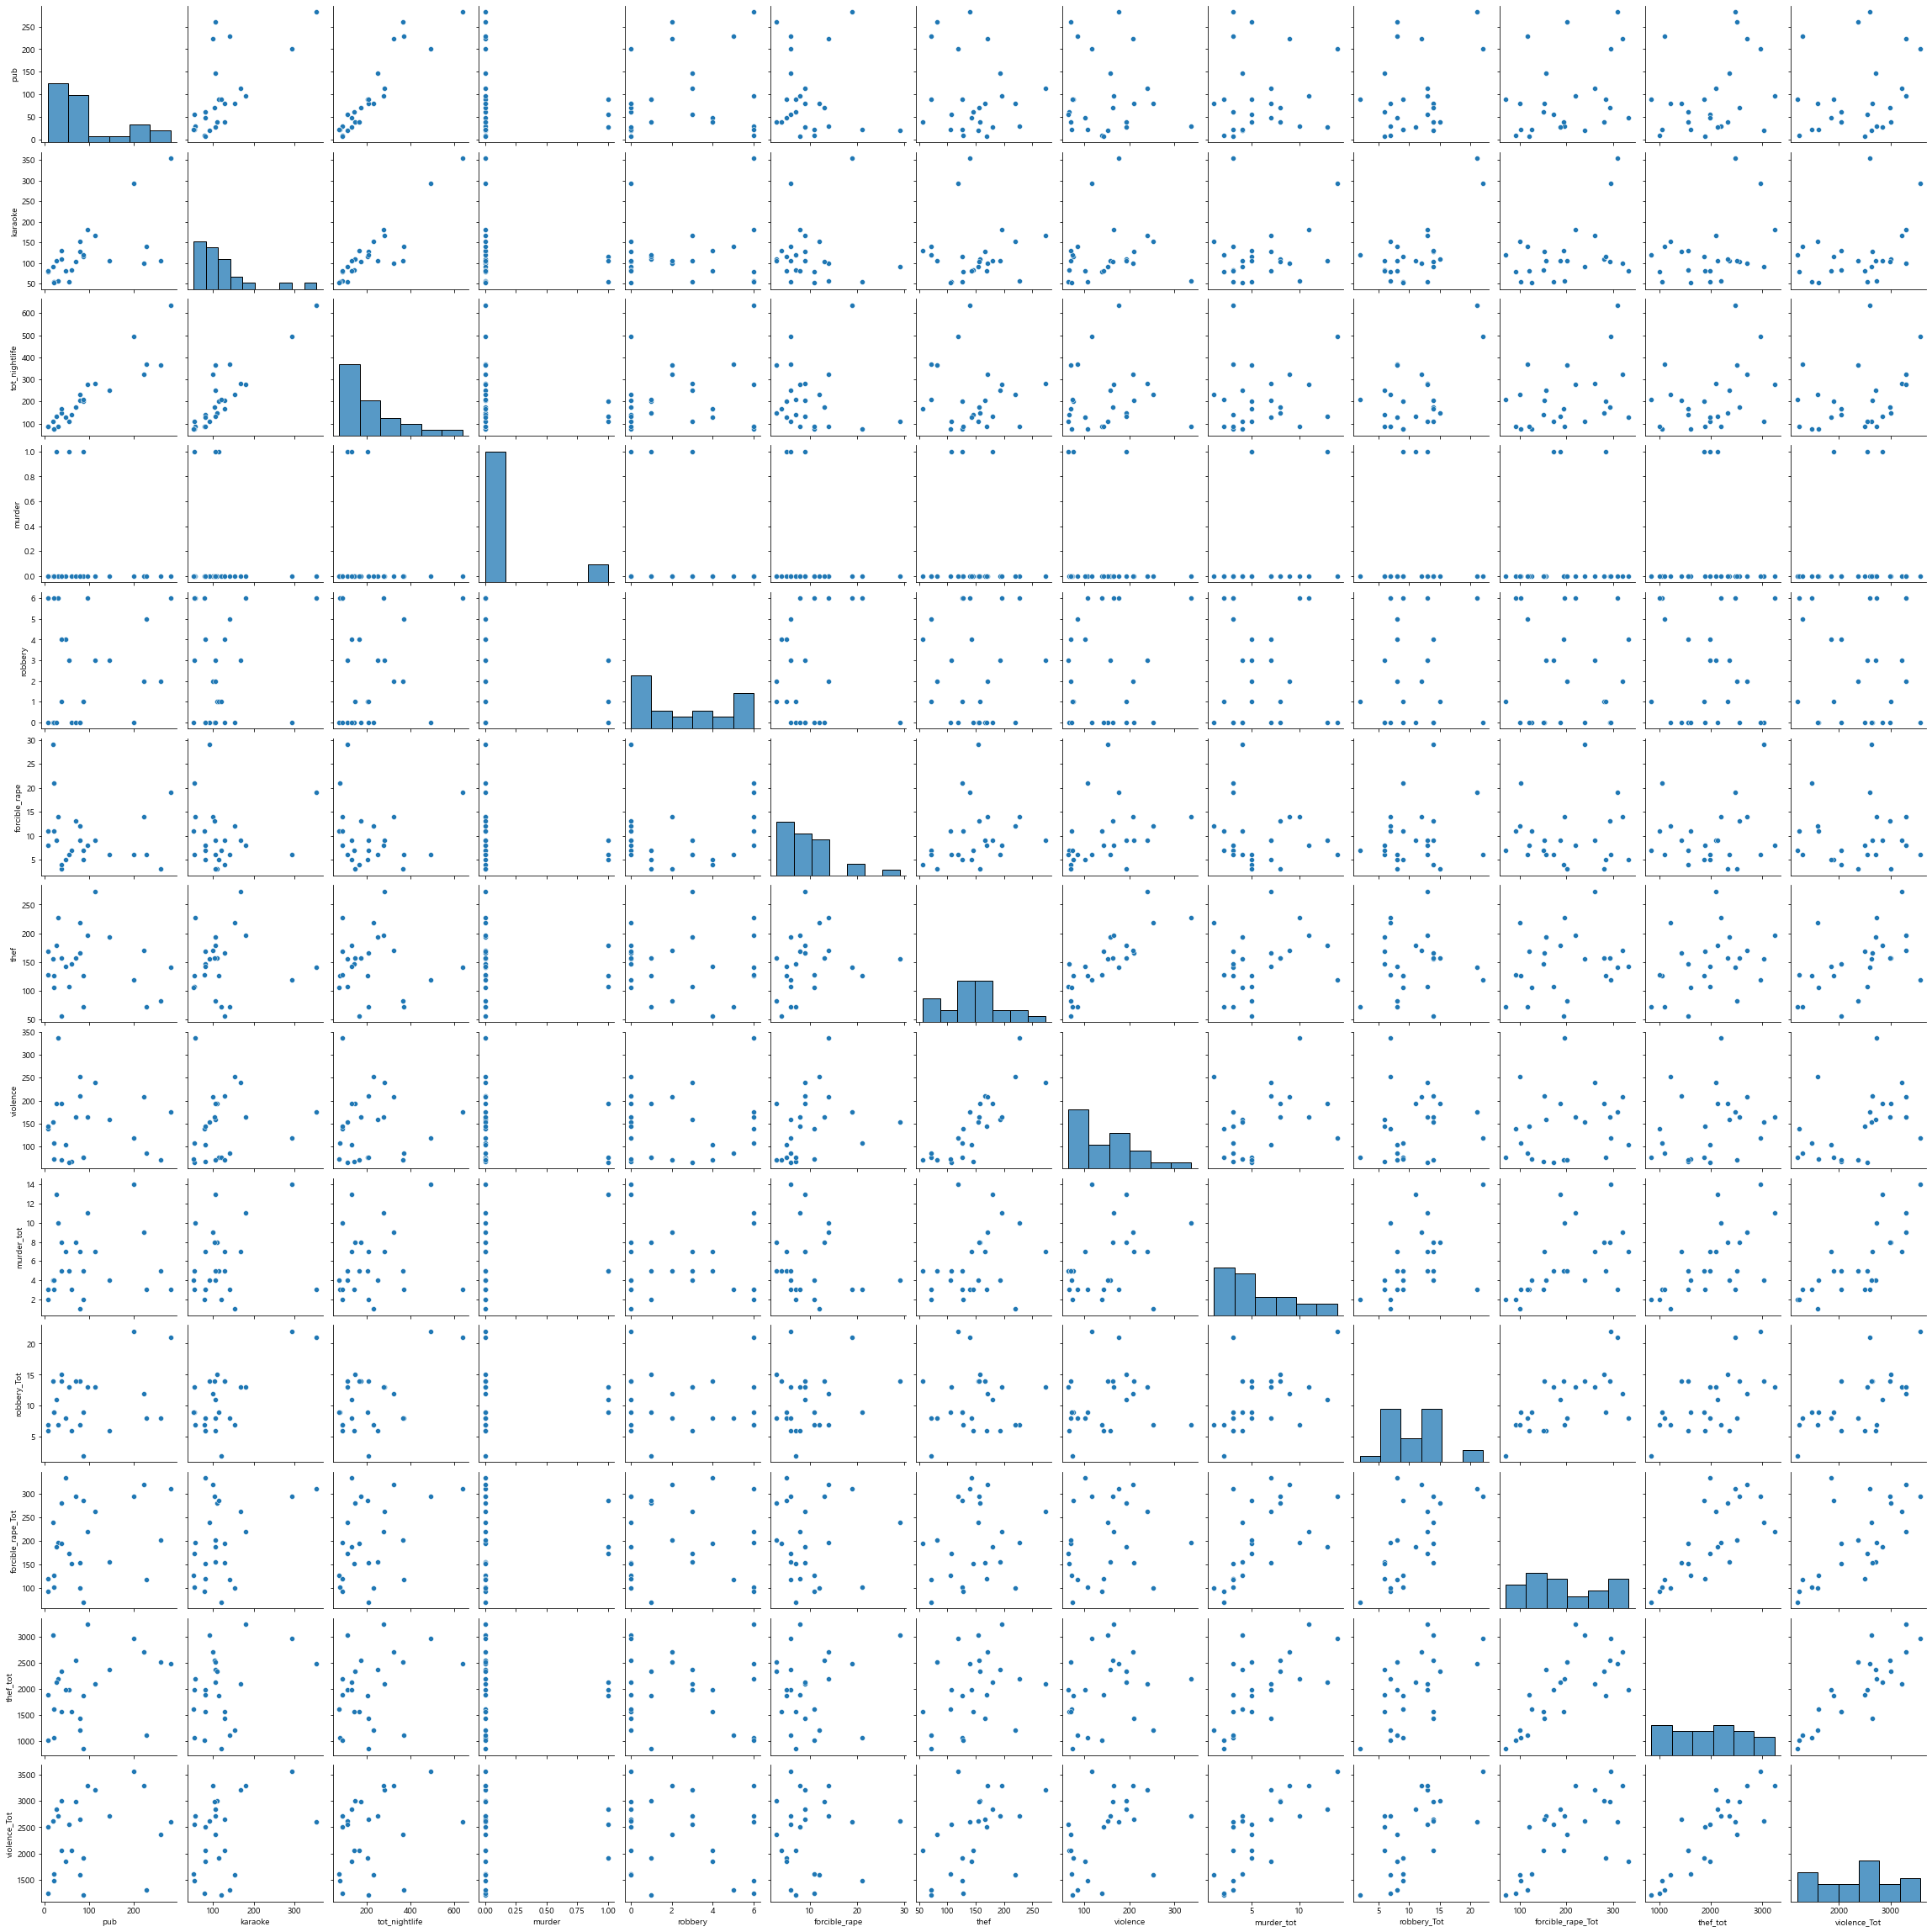

In [75]:
sns.pairplot(df2_region)
plt.show()

In [76]:
df3_region = df2_region.copy()

In [78]:
df4_region = df3_region.drop(['tot_nightlife','murder_tot','robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot'],axis=1)

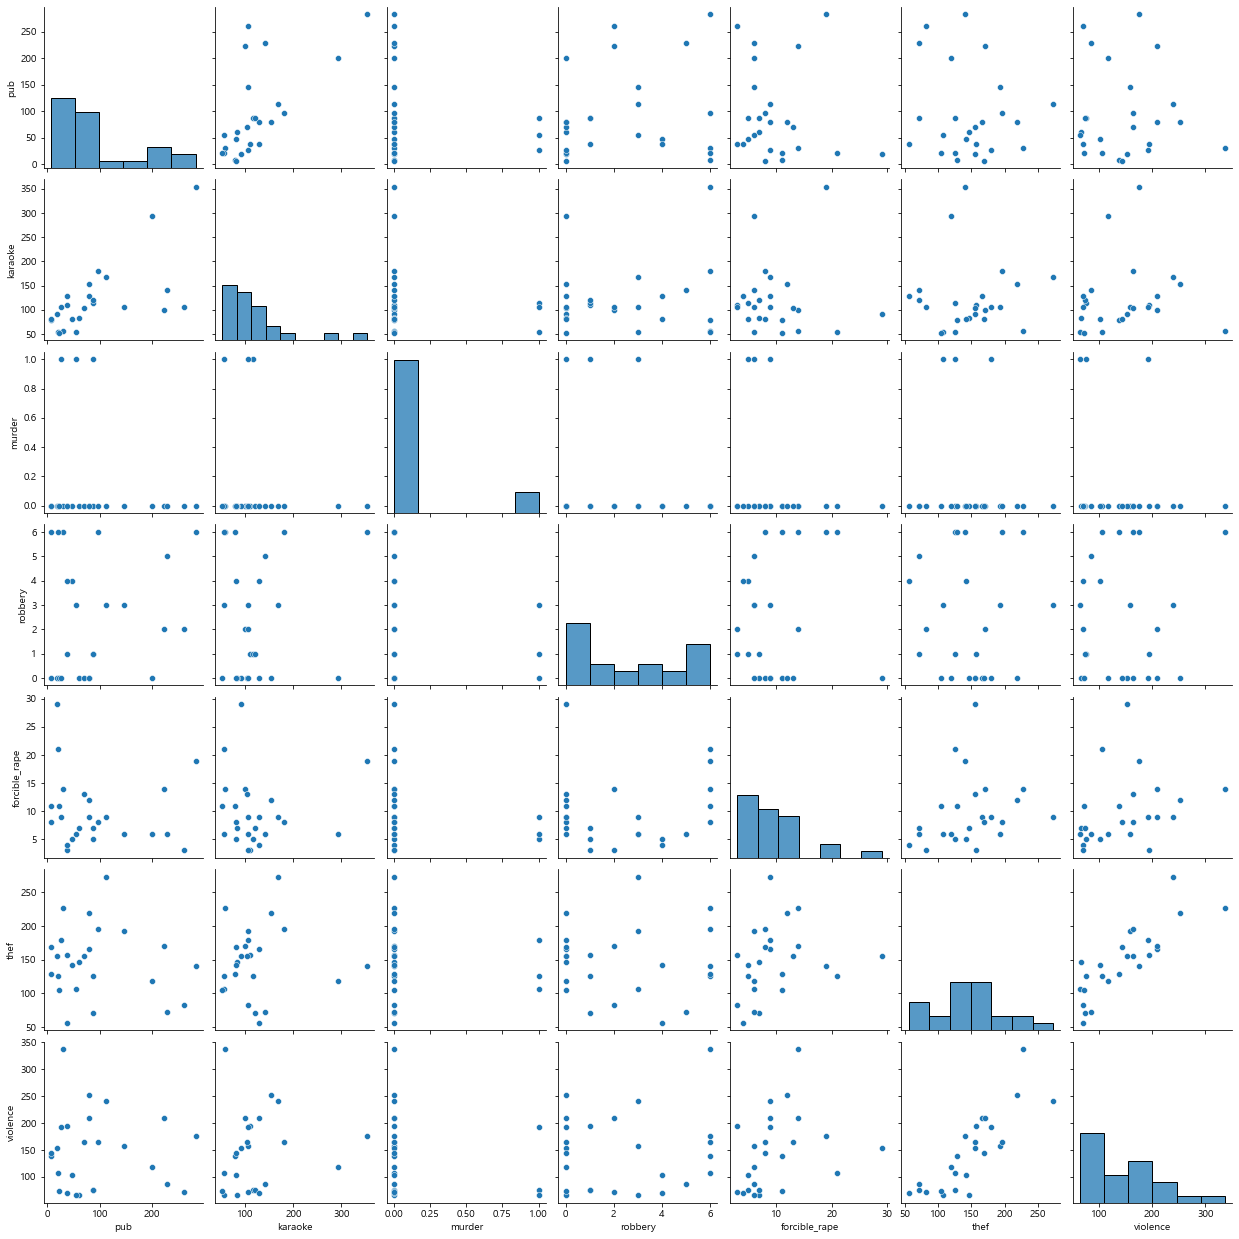

In [79]:
sns.pairplot(df4_region)
plt.show()